# project

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from lazypredict.Supervised import LazyRegressor
from sklearn.utils import all_estimators
from sklearn.base import RegressorMixin
from sklearn.model_selection import learning_curve

In [56]:
!pip install lazypredict


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\k vaishnavi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [57]:
Path_to_data = r"..\Documents\climate-ds.csv"  # Moves up one directory
data = pd.read_csv(Path_to_data, index_col=['Unnamed: 0'])
data.head(10)

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield
0,Albania,Maize,1990,1485,121.00,16.37,36613
1,Albania,Potatoes,1990,1485,121.00,16.37,66667
2,Albania,"Rice, paddy",1990,1485,121.00,16.37,23333
3,Albania,Sorghum,1990,1485,121.00,16.37,12500
4,Albania,Soybeans,1990,1485,121.00,16.37,7000
5,Albania,Wheat,1990,1485,121.00,16.37,30197
6,Albania,Maize,1991,1485,121.00,15.36,29068
7,Albania,Potatoes,1991,1485,121.00,15.36,77818
8,Albania,"Rice, paddy",1991,1485,121.00,15.36,28538
9,Albania,Sorghum,1991,1485,121.00,15.36,6667


In [58]:
rows , columns = data.shape

print('There are {} rows and {} columns.'.format(rows,columns))

There are 28242 rows and 7 columns.


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   average_rain_fall_mm_per_year  28242 non-null  int64  
 4   pesticides_tonnes              28242 non-null  float64
 5   avg_temp                       28242 non-null  float64
 6   hg/ha_yield                    28242 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 1.7+ MB


In [60]:
data.describe()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield
count,28242.00,28242.00,28242.00,28242.00,28242.00
mean,2001.54,1149.06,37076.91,20.54,77053.33
std,7.05,709.81,59958.78,6.31,84956.61
min,1990.00,51.00,0.04,1.30,50.00
25%,1995.00,593.00,1702.00,16.70,19919.25
50%,2001.00,1083.00,17529.44,21.51,38295.00
75%,2008.00,1668.00,48687.88,26.00,104676.75
max,2013.00,3240.00,367778.00,30.65,501412.00


In [61]:
data.isnull().sum()

Area                             0
Item                             0
Year                             0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
hg/ha_yield                      0
dtype: int64

In [62]:
data["Item"].value_counts()

Item
Potatoes                4276
Maize                   4121
Wheat                   3857
Rice, paddy             3388
Soybeans                3223
Sorghum                 3039
Sweet potatoes          2890
Cassava                 2045
Yams                     847
Plantains and others     556
Name: count, dtype: int64

In [63]:
df0 = data.loc[data["Item"]=="Potatoes"]
df0.sort_values("average_rain_fall_mm_per_year", inplace=True)
df1 = data.loc[data["Item"]=="Maize"]
df1.sort_values("average_rain_fall_mm_per_year", inplace=True)
df2 = data.loc[data["Item"]=="Wheat"]
df2.sort_values("average_rain_fall_mm_per_year", inplace=True)
df3 = data.loc[data["Item"]=="Rice, paddy"]
df3.sort_values("average_rain_fall_mm_per_year", inplace=True)
df4 = data.loc[data["Item"]=="Soybeans"]
df4.sort_values("average_rain_fall_mm_per_year", inplace=True)
df5 = data.loc[data["Item"]=="Sorghum"]
df5.sort_values("average_rain_fall_mm_per_year", inplace=True)
df6 = data.loc[data["Item"]=="Sweet potatoes"]
df6.sort_values("average_rain_fall_mm_per_year", inplace=True)
df7 = data.loc[data["Item"]=="Cassava"]
df7.sort_values("average_rain_fall_mm_per_year", inplace=True)
df8 = data.loc[data["Item"]=="Yams"]
df8.sort_values("average_rain_fall_mm_per_year", inplace=True)
df9 = data.loc[data["Item"]=="Plantains and others"]
df9.sort_values("average_rain_fall_mm_per_year", inplace=True)

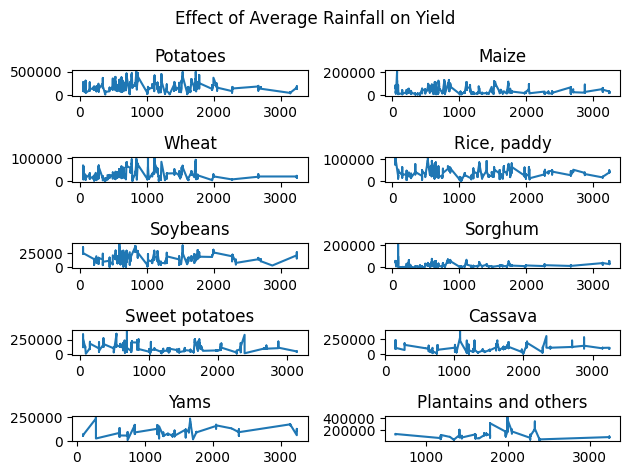

In [64]:
figure, axis = plt.subplots(5, 2)
figure.suptitle('Effect of Average Rainfall on Yield')
axis[0,0].plot(df0["average_rain_fall_mm_per_year"], df0["hg/ha_yield"])
axis[0,0].set_title('Potatoes')
axis[0,1].plot(df1["average_rain_fall_mm_per_year"], df1["hg/ha_yield"])
axis[0,1].set_title('Maize')
axis[1,0].plot(df2["average_rain_fall_mm_per_year"], df2["hg/ha_yield"])
axis[1,0].set_title('Wheat')
axis[1,1].plot(df3["average_rain_fall_mm_per_year"], df3["hg/ha_yield"])
axis[1,1].set_title('Rice, paddy')
axis[2,0].plot(df4["average_rain_fall_mm_per_year"], df4["hg/ha_yield"])
axis[2,0].set_title('Soybeans')
axis[2,1].plot(df5["average_rain_fall_mm_per_year"], df5["hg/ha_yield"])
axis[2,1].set_title('Sorghum')
axis[3,0].plot(df6["average_rain_fall_mm_per_year"], df6["hg/ha_yield"])
axis[3,0].set_title('Sweet potatoes')
axis[3,1].plot(df7["average_rain_fall_mm_per_year"], df7["hg/ha_yield"])
axis[3,1].set_title('Cassava')
axis[4,0].plot(df8["average_rain_fall_mm_per_year"], df8["hg/ha_yield"])
axis[4,0].set_title('Yams')
axis[4,1].plot(df9["average_rain_fall_mm_per_year"], df9["hg/ha_yield"])
axis[4,1].set_title('Plantains and others')
plt.tight_layout()
plt.show()

In [65]:
df0.sort_values("avg_temp", inplace=True)
df1.sort_values("avg_temp", inplace=True)
df2.sort_values("avg_temp", inplace=True)
df3.sort_values("avg_temp", inplace=True)
df4.sort_values("avg_temp", inplace=True)
df5.sort_values("avg_temp", inplace=True)
df6.sort_values("avg_temp", inplace=True)
df7.sort_values("avg_temp", inplace=True)
df8.sort_values("avg_temp", inplace=True)
df9.sort_values("avg_temp", inplace=True)


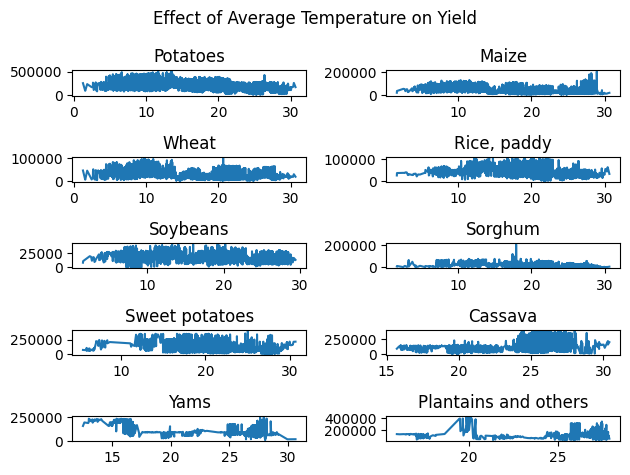

In [66]:
figure, axis = plt.subplots(5, 2)
figure.suptitle('Effect of Average Temperature on Yield')
axis[0,0].plot(df0["avg_temp"], df0["hg/ha_yield"])
axis[0,0].set_title('Potatoes')
axis[0,1].plot(df1["avg_temp"], df1["hg/ha_yield"])
axis[0,1].set_title('Maize')
axis[1,0].plot(df2["avg_temp"], df2["hg/ha_yield"])
axis[1,0].set_title('Wheat')
axis[1,1].plot(df3["avg_temp"], df3["hg/ha_yield"])
axis[1,1].set_title('Rice, paddy')
axis[2,0].plot(df4["avg_temp"], df4["hg/ha_yield"])
axis[2,0].set_title('Soybeans')
axis[2,1].plot(df5["avg_temp"], df5["hg/ha_yield"])
axis[2,1].set_title('Sorghum')
axis[3,0].plot(df6["avg_temp"], df6["hg/ha_yield"])
axis[3,0].set_title('Sweet potatoes')
axis[3,1].plot(df7["avg_temp"], df7["hg/ha_yield"])
axis[3,1].set_title('Cassava')
axis[4,0].plot(df8["avg_temp"], df8["hg/ha_yield"])
axis[4,0].set_title('Yams')
axis[4,1].plot(df9["avg_temp"], df9["hg/ha_yield"])
axis[4,1].set_title('Plantains and others')
plt.tight_layout()
plt.show()

In [67]:
df0.sort_values("pesticides_tonnes", inplace=True)
df1.sort_values("pesticides_tonnes", inplace=True)
df2.sort_values("pesticides_tonnes", inplace=True)
df3.sort_values("pesticides_tonnes", inplace=True)
df4.sort_values("pesticides_tonnes", inplace=True)
df5.sort_values("pesticides_tonnes", inplace=True)
df6.sort_values("pesticides_tonnes", inplace=True)
df7.sort_values("pesticides_tonnes", inplace=True)
df8.sort_values("pesticides_tonnes", inplace=True)
df9.sort_values("pesticides_tonnes", inplace=True)

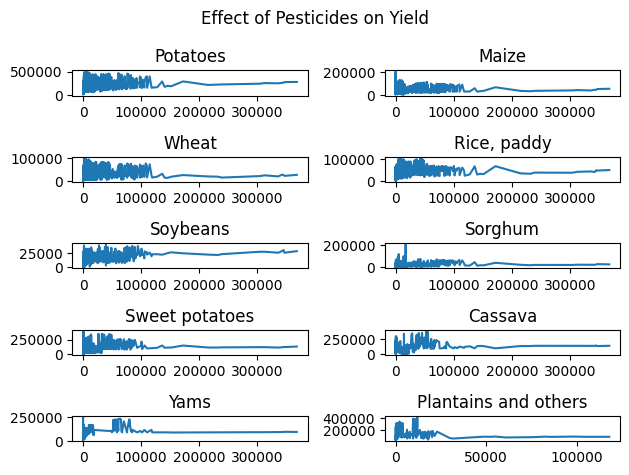

In [68]:
figure, axis = plt.subplots(5, 2)
figure.suptitle('Effect of Pesticides on Yield')
axis[0,0].plot(df0["pesticides_tonnes"], df0["hg/ha_yield"])
axis[0,0].set_title('Potatoes')
axis[0,1].plot(df1["pesticides_tonnes"], df1["hg/ha_yield"])
axis[0,1].set_title('Maize')
axis[1,0].plot(df2["pesticides_tonnes"], df2["hg/ha_yield"])
axis[1,0].set_title('Wheat')
axis[1,1].plot(df3["pesticides_tonnes"], df3["hg/ha_yield"])
axis[1,1].set_title('Rice, paddy')
axis[2,0].plot(df4["pesticides_tonnes"], df4["hg/ha_yield"])
axis[2,0].set_title('Soybeans')
axis[2,1].plot(df5["pesticides_tonnes"], df5["hg/ha_yield"])
axis[2,1].set_title('Sorghum')
axis[3,0].plot(df6["pesticides_tonnes"], df6["hg/ha_yield"])
axis[3,0].set_title('Sweet potatoes')
axis[3,1].plot(df7["pesticides_tonnes"], df7["hg/ha_yield"])
axis[3,1].set_title('Cassava')
axis[4,0].plot(df8["pesticides_tonnes"], df8["hg/ha_yield"])
axis[4,0].set_title('Yams')
axis[4,1].plot(df9["pesticides_tonnes"], df9["hg/ha_yield"])
axis[4,1].set_title('Plantains and others')
plt.tight_layout()
plt.show()


In [69]:
data = data.drop(["Year"], axis=1)

In [70]:
data.head(10)

,Area,Item,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield
0,Albania,Maize,1485,121.00,16.37,36613
1,Albania,Potatoes,1485,121.00,16.37,66667
2,Albania,"Rice, paddy",1485,121.00,16.37,23333
3,Albania,Sorghum,1485,121.00,16.37,12500
4,Albania,Soybeans,1485,121.00,16.37,7000
5,Albania,Wheat,1485,121.00,16.37,30197
6,Albania,Maize,1485,121.00,15.36,29068
7,Albania,Potatoes,1485,121.00,15.36,77818
8,Albania,"Rice, paddy",1485,121.00,15.36,28538
9,Albania,Sorghum,1485,121.00,15.36,6667


In [71]:
data = pd.get_dummies(data, columns=['Area',"Item"])

In [72]:
data.head(10)

,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield,Area_Albania,Area_Algeria,Area_Angola,Area_Argentina,Area_Armenia,Area_Australia,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,1485,121.00,16.37,36613,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,1485,121.00,16.37,66667,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,1485,121.00,16.37,23333,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,1485,121.00,16.37,12500,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,1485,121.00,16.37,7000,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
5,1485,121.00,16.37,30197,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
6,1485,121.00,15.36,29068,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
7,1485,121.00,15.36,77818,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
8,1485,121.00,15.36,28538,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
9,1485,121.00,15.36,6667,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [73]:
X = data.loc[:, data.columns != 'hg/ha_yield']
Y = data['hg/ha_yield'].values.ravel()


In [74]:
X.head(10)

,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area_Albania,Area_Algeria,Area_Angola,Area_Argentina,Area_Armenia,Area_Australia,Area_Austria,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,1485,121.00,16.37,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,1485,121.00,16.37,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,1485,121.00,16.37,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,1485,121.00,16.37,True,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,1485,121.00,16.37,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
5,1485,121.00,16.37,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
6,1485,121.00,15.36,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
7,1485,121.00,15.36,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
8,1485,121.00,15.36,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
9,1485,121.00,15.36,True,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [75]:
print(Y[:10])  # Displays first 10 values of Y


[36613 66667 23333 12500  7000 30197 29068 77818 28538  6667]


In [76]:
x_max = X.max()
X = X.divide(x_max)
X.describe()

,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area_Albania,Area_Algeria,Area_Angola,Area_Argentina,Area_Armenia,Area_Australia,Area_Austria,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
count,28242.00,28242.00,28242.00,28242.00,28242.00,28242.00,28242.00,28242.00,28242.00,28242.00,...,28242.00,28242.00,28242.00,28242.00,28242.00,28242.00,28242.00,28242.00,28242.00,28242.00
unique,100.00,1673.00,1831.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,...,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00
top,0.33,0.00,0.89,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
freq,4048.00,720.00,90.00,28143.00,28128.00,28078.00,27874.00,28179.00,27276.00,28146.00,...,26197.00,24121.00,27686.00,23966.00,24854.00,25203.00,25019.00,25352.00,24385.00,27395.00


In [77]:
print(X.shape)
print(Y.shape)

(28242, 114)
(28242,)


In [78]:
Y = pd.DataFrame(Y)  # Ensure Y is a DataFrame before splitting
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [79]:
print(x_train.shape)
print(y_train.shape)

(22593, 114)
(22593, 1)


In [80]:
print(x_train.dtypes)


average_rain_fall_mm_per_year    object
pesticides_tonnes                object
avg_temp                         object
Area_Albania                     object
Area_Algeria                     object
                                  ...  
Item_Sorghum                     object
Item_Soybeans                    object
Item_Sweet potatoes              object
Item_Wheat                       object
Item_Yams                        object
Length: 114, dtype: object


In [81]:
for col in x_train.columns:
    x_train[col] = pd.to_numeric(x_train[col], errors='coerce')
    x_test[col] = pd.to_numeric(x_test[col], errors='coerce')


In [82]:
x_train = pd.get_dummies(x_train)
x_test = pd.get_dummies(x_test)

# Align train & test sets (handle missing columns)
x_train, x_test = x_train.align(x_test, join='left', axis=1, fill_value=0)


In [83]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in x_train.select_dtypes(include=['object']).columns:
    label_encoders[col] = LabelEncoder()
    x_train[col] = label_encoders[col].fit_transform(x_train[col])
    x_test[col] = label_encoders[col].transform(x_test[col])


In [84]:
# Install lazypredict if not already installed
# pip install lazypredict

from lazypredict.Supervised import LazyRegressor
from sklearn.utils import all_estimators
from sklearn.base import RegressorMixin

# Select chosen regressors
chosen_regressors = [
    'RandomForestRegressor',
    'BaggingRegressor',
    'GradientBoostingRegressor',
    'AdaBoostRegressor',
    'DecisionTreeRegressor',
    'SGDRegressor',
    'LinearRegression'
]

# Get all regressors from sklearn
REGRESSORS = [
    est
    for est in all_estimators()
    if issubclass(est[1], RegressorMixin) and est[0] in chosen_regressors
]

# Initialize LazyRegressor
reg = LazyRegressor(verbose=1, ignore_warnings=False, custom_metric=None, regressors=REGRESSORS)

# Fit the model (ensure x_train, x_test, y_train, y_test are defined)
models, predictions = reg.fit(x_train, x_test, y_train, y_test)

# Display results
print(models)
  # To verify the selected regressors


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


 14%|████████████                                                                        | 1/7 [00:04<00:27,  4.63s/it]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.5195768843709138, 'Adjusted R-Squared': 0.5096802029141527, 'RMSE': np.float64(59032.46300125445), 'Time taken': 4.628654479980469}


 29%|████████████████████████                                                            | 2/7 [00:08<00:19,  3.93s/it]

{'Model': 'BaggingRegressor', 'R-Squared': 0.9712500574570859, 'Adjusted R-Squared': 0.9706578107187607, 'RMSE': np.float64(14441.005934058876), 'Time taken': 3.444916009902954}


 43%|████████████████████████████████████                                                | 3/7 [00:08<00:09,  2.44s/it]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.9613745124829245, 'Adjusted R-Squared': 0.9605788302319402, 'RMSE': np.float64(16738.477116022772), 'Time taken': 0.659080982208252}


 57%|████████████████████████████████████████████████                                    | 4/7 [00:16<00:13,  4.47s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.8635650995312147, 'Adjusted R-Squared': 0.8607545504431335, 'RMSE': np.float64(31458.76687631324), 'Time taken': 7.570325136184692}


 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:22<00:10,  5.08s/it]

{'Model': 'LinearRegression', 'R-Squared': 0.7491698070730692, 'Adjusted R-Squared': 0.7440027232288933, 'RMSE': np.float64(42654.893504506734), 'Time taken': 6.1757214069366455}


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:49<00:12, 12.66s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.9736469546692591, 'Adjusted R-Squared': 0.9731040838402558, 'RMSE': np.float64(13825.930213281763), 'Time taken': 27.380302667617798}


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:50<00:00,  7.20s/it]

{'Model': 'SGDRegressor', 'R-Squared': 0.741413963562933, 'Adjusted R-Squared': 0.7360871099030439, 'RMSE': np.float64(43309.33253423219), 'Time taken': 0.5552277565002441}
                           Adjusted R-Squared  R-Squared     RMSE  Time Taken
Model                                                                        
RandomForestRegressor                    0.97       0.97 13825.93       27.38
BaggingRegressor                         0.97       0.97 14441.01        3.44
DecisionTreeRegressor                    0.96       0.96 16738.48        0.66
GradientBoostingRegressor                0.86       0.86 31458.77        7.57
LinearRegression                         0.74       0.75 42654.89        6.18
SGDRegressor                             0.74       0.74 43309.33        0.56
AdaBoostRegressor                        0.51       0.52 59032.46        4.63


In [85]:
print(data.columns)

Index(['average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp',
       'hg/ha_yield', 'Area_Albania', 'Area_Algeria', 'Area_Angola',
       'Area_Argentina', 'Area_Armenia', 'Area_Australia',
       ...
       'Item_Cassava', 'Item_Maize', 'Item_Plantains and others',
       'Item_Potatoes', 'Item_Rice, paddy', 'Item_Sorghum', 'Item_Soybeans',
       'Item_Sweet potatoes', 'Item_Wheat', 'Item_Yams'],
      dtype='object', length=115)


In [86]:
models


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,0.97,0.97,13825.93,27.38
BaggingRegressor,0.97,0.97,14441.01,3.44
DecisionTreeRegressor,0.96,0.96,16738.48,0.66
GradientBoostingRegressor,0.86,0.86,31458.77,7.57
LinearRegression,0.74,0.75,42654.89,6.18
SGDRegressor,0.74,0.74,43309.33,0.56
AdaBoostRegressor,0.51,0.52,59032.46,4.63


In [87]:
model_rfg = RandomForestRegressor(n_estimators = 100, random_state = 0)

model_rfg.fit(x_train, y_train)
print('Model trained!')

Model trained!


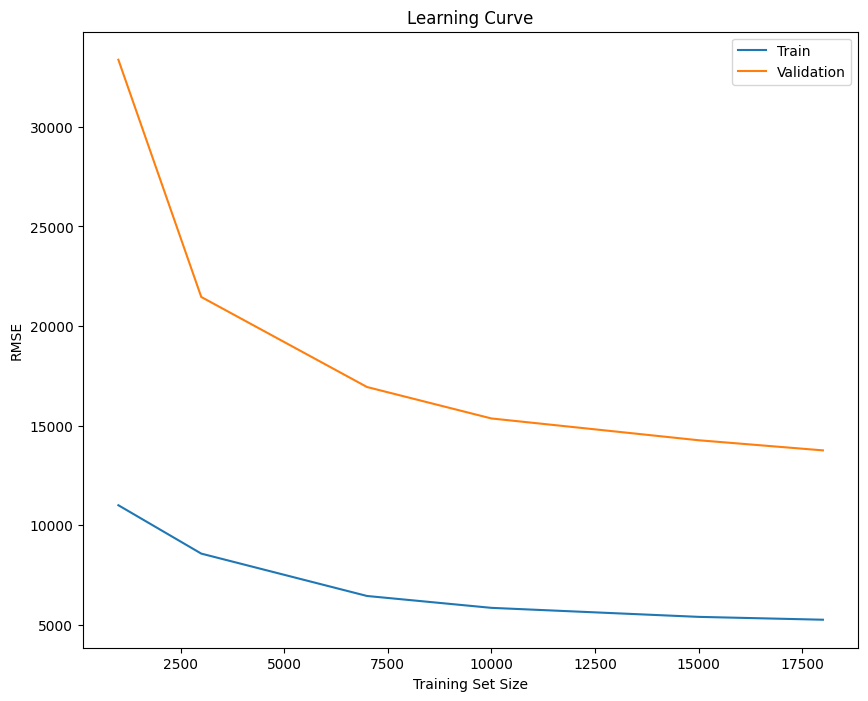

In [88]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Assuming model_rfg, x_train, and y_train are already defined

train_sizes, train_scores, test_scores = learning_curve(
    estimator=model_rfg,
    X=x_train,
    y=y_train,
    cv=5,
    scoring="neg_root_mean_squared_error",
    train_sizes=[1000, 3000, 7000, 10000, 15000, 18000]
)

train_mean = -train_scores.mean(axis=1)
test_mean = -test_scores.mean(axis=1)

plt.subplots(figsize=(10, 8))
plt.plot(train_sizes, train_mean, label="Train")
plt.plot(train_sizes, test_mean, label="Validation")

plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("RMSE")
plt.legend(loc="best")

plt.show()


In [89]:
print('Model score {}'.format(model_rfg.score(x_test, y_test)))

Model score 0.9737621063109473


In [90]:
import pandas as pd

# Ensure y_test is a DataFrame
if isinstance(y_test, np.ndarray):
    y_test = pd.DataFrame(y_test, columns=["yield_predicted"])

In [91]:
y_test["yield_predicted"]= model_rfg.predict(x_test)

In [92]:
y_test.head(10)

,0,yield_predicted
25564,69220,71405.79
18113,20000,23741.06
25607,51206,53899.24
6815,166986,155426.20
18144,56319,52806.89
12680,26163,26163.00
3474,30708,30523.14
22381,109771,110049.57
20656,241650,237031.20
23170,47500,44156.99


In [93]:
print("y_test columns:", y_test.columns.tolist())  # Display column names
print(y_test.head())  # Show first few rows to verify structure


y_test columns: [0, 'yield_predicted']
            0  yield_predicted
25564   69220         71405.79
18113   20000         23741.06
25607   51206         53899.24
6815   166986        155426.20
18144   56319         52806.89


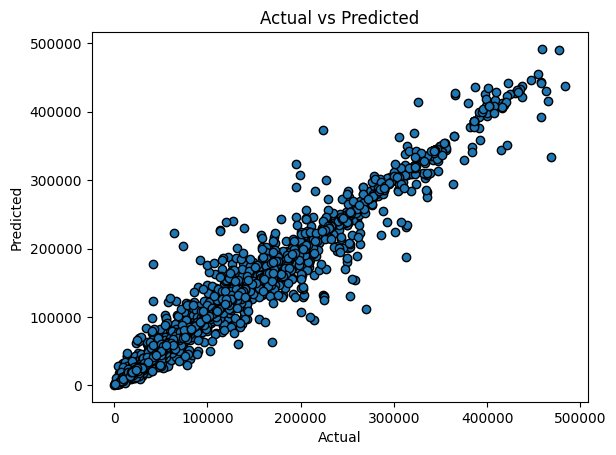

In [94]:
fig, ax = plt.subplots() 

ax.scatter(y_test[0], y_test["yield_predicted"], edgecolors=(0, 0, 0))  # Use '0' instead of 'hg/ha_yield'

ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()


In [95]:
# Ensure y_test is a 1D array (only actual values)
y_test_actual = y_test[0]  # Use the correct column that holds actual values

# Compute R² Score
train_r2 = model_rfg.score(x_train, y_train)
test_r2 = model_rfg.score(x_test, y_test_actual)  # Use the corrected y_test

# Print results
print(f"Training R² Score: {train_r2:.4f}")
print(f"Testing R² Score: {test_r2:.4f}")


Training R² Score: 0.9964
Testing R² Score: 0.9738
